In [2]:
# Importacion de Librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf               # Libreria Financiera
from bs4 import BeautifulSoup       # Libreria Web Scraping
import requests                     # Libreria para hacer llamados a la página web que queremos extraer
import matplotlib.pyplot as plt     # Libreria para hacer el grafico boxplot
import seaborn as sns

In [ ]:
# Variables Globales
global df_bitcoin, precio_actual, tendencia, media_bitcoin,  algoritmo_decision

In [3]:
# URL para extraer informacion (webscraping)
url = "https://coinmarketcap.com/"
url_historico = "https://coinmarketcap.com/currencies/bitcoin/historical-data/"

# Definir el User-Agent
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/113.0.0.0 Safari/537.36'} 


In [4]:
# Crear la peticion
respuesta = requests.get(url, headers=headers)
contenido = respuesta.text


In [5]:
# Obtener la tabla con la informacion
tablas = pd.read_html(respuesta.content, encoding = 'utf8')
print(f'Total tablas encontradas: {len(tablas)}')
print(tablas)

Total tablas encontradas: 1
[    Unnamed: 0    #                      Name       Price   1h %  24h %  \
0          NaN  1.0               Bitcoin1BTC  $26,884.68  0.16%  0.18%   
1          NaN  2.0              Ethereum2ETH   $1,816.88  0.08%  0.20%   
2          NaN  3.0               Tether3USDT       $1.00  0.00%  0.04%   
3          NaN  4.0                   BNB4BNB     $309.83  0.04%  0.07%   
4          NaN  5.0             USD Coin5USDC     $0.9999  0.00%  0.01%   
..         ...  ...                       ...         ...    ...    ...   
95         NaN  NaN             THORChainRUNE       $1.11    NaN    NaN   
96         NaN  NaN         Convex FinanceCVX       $4.54    NaN    NaN   
97         NaN  NaN          Mask NetworkMASK       $4.33    NaN    NaN   
98         NaN  NaN             Enjin CoinENJ       $0.34    NaN    NaN   
99         NaN  NaN  Basic Attention TokenBAT       $0.22    NaN    NaN   

     7d %                Market Cap                         Volume(24h

# 2. OBTENIENDO LOS DATOS (Precio Actual, Tendencia y Valor de Tendencia)

In [6]:
# Implementacion de la Funcion extraer_tendencia(), funcion que recupera precio actual del Bitcoin, el valor de la tendencia y el tipo de tendencia, si es alta o baja.
s=BeautifulSoup(contenido, features='lxml')

def extraer_tendencias():
  global tendencia, precio_actual, valor_tendencia
  monedas = s.find('p',{'class':'sc-4984dd93-0 kKpPOn'})
  monedas = monedas.text.strip()
  precio_sin_formato = s.find('div', {'class':'sc-cadad039-0 clgqXO'})
  precio_sin_formato = precio_sin_formato.text.strip()
  precio_sin_formato = precio_sin_formato.replace('$','')
  precio_sin_formato = precio_sin_formato.replace(',','')
  precio_actual = float(precio_sin_formato)

  valor_tendencia = s.find('span', {'class':'sc-97d6d2ca-0 bQjSqS'})
  valor_tendencia = valor_tendencia.text.strip()
  valor_tendencia = float(valor_tendencia.replace('%',''))
  tendencias = s.find('span', {'class': ['icon-Caret-down','icon-Caret-up']})

  if ('icon-Caret-down') in tendencias['class']:
    tendencia = 'baja'
  if ('icon-Caret-up') in tendencias['class']:
    tendencia = 'alta'

  print(f'Tendecia: {tendencia} Valor Tendencia: {valor_tendencia}')
  print(f'Precio Actual: {precio_actual}')

extraer_tendencias()


Tendecia: baja Valor Tendencia: 0.16
Precio Actual: 26884.68


# 2. OBTENIENDO LOS DATOS HISTORICOS (Ultimos 7 dias con intervalo de 5 minutos)


In [7]:
# Implementando yfinance para tener el historico
# Definir la funcion importar_base_bitcoin(), funcion que extrae el historico del Bitcoin de los ultimos 7 dias
def importar_base_bitcoin():
  global df_bitcoin
  ticker = 'BTC-USD'
  periodo = '7d'
  intervalo = '5m'
  df_bitcoin = yf.download(ticker, period=periodo, interval=intervalo)
  print(df_bitcoin)

importar_base_bitcoin()

[*********************100%***********************]  1 of 1 completed
                                   Open          High           Low  \
Datetime                                                              
2023-05-16 00:00:00+00:00  27171.513672  27180.341797  27171.226562   
2023-05-16 00:05:00+00:00  27170.492188  27202.392578  27170.492188   
2023-05-16 00:10:00+00:00  27221.753906  27222.830078  27208.285156   
2023-05-16 00:15:00+00:00  27221.365234  27270.158203  27221.365234   
2023-05-16 00:20:00+00:00  27264.189453  27287.683594  27264.189453   
...                                 ...           ...           ...   
2023-05-22 15:20:00+00:00  26829.132812  26857.501953  26829.132812   
2023-05-22 15:25:00+00:00  26872.791016  26879.097656  26852.402344   
2023-05-22 15:30:00+00:00  26853.484375  26883.570312  26853.484375   
2023-05-22 15:35:00+00:00  26882.001953  26885.160156  26877.873047   
2023-05-22 15:40:00+00:00  26876.046875  26895.382812  26874.304688   

       

In [ ]:
# Definicion de funciones
def importar_base_bitcoin():
  """ Funcion que extrae el historico de precios de los ultimos 7 dias en intervalos de 5 minutos y se guarda en el dataframe df_bitcoin """
  global df_bitcoin, precio_actual, tendencia, media_bitcoin,  algoritmo_decision

def extraer_tendencias():
  """ Funcion que extrae el precio actual del bitcoin y su variacion en la ultima hora. El precio se convierte a float y se guarda en precio_actual. En tendencia se guarda el valor baja si es negativa o alta si es positiva """
  global df_bitcoin, precio_actual, tendencia, media_bitcoin,  algoritmo_decision

# 3. LIMPIEZA DE DATOS

In [8]:
# Implementar funcion limpieza_datos(), crea una copia df_bitcoin_limpio.
# Datetime: Indice del dataframe y contiene la fecha y hora del intervalo, no puede estar duplicado (Elimina los duplicados)
# Open: precio del Bitcoin al inicio del intervalo
# High: precio mas alto del Bitcoin durante el intervalo
# Low: precio mas bajo del Bitcoin durante el intervalo
# Close: precio del Bitcoin al final del intervalo (Trata los valores nulos)
# Volume: total de transacciones hechas durante el intervalo (Elimina los registros que no tengan Volume > 0)

# Elimina los outliers (atipicos) en el precio del Bitcoin, columna Close, utiliza un grafico de boxplot
# Filtra unicamente los registros cuyo precio (Close) estan entre el 1er y el 3er cuartil del boxplot
# Calcula el precio promedio (Close) de esta seleccion y guardala en media_bitcoin

def limpieza_datos():
  global df_bitcoin, df_bitcoin_limpio, media_bitcoin
  #df_bitcoin_limpio = df_bitcoin[['Close', 'Volume']]
  df_bitcoin_limpio = df_bitcoin.copy()

  #print(df_bitcoin_limpio)
  duplicados = df_bitcoin_limpio.index.duplicated()
  df_bitcoin_limpio = df_bitcoin_limpio[~duplicados]
  df_bitcoin_limpio = df_bitcoin_limpio[df_bitcoin_limpio['Volume'] > 0]
  df_bitcoin_limpio = df_bitcoin_limpio[df_bitcoin_limpio['Close'] != 0]
  print(df_bitcoin_limpio)
  #print(len(duplicados))
  print(df_bitcoin_limpio)
  #print(len(df_bitcoin_limpio))

limpieza_datos()


                                   Open          High           Low  \
Datetime                                                              
2023-05-16 00:05:00+00:00  27170.492188  27202.392578  27170.492188   
2023-05-16 00:10:00+00:00  27221.753906  27222.830078  27208.285156   
2023-05-16 00:50:00+00:00  27205.384766  27224.789062  27144.626953   
2023-05-16 00:55:00+00:00  27215.669922  27215.669922  27198.185547   
2023-05-16 01:05:00+00:00  27238.148438  27252.714844  27232.652344   
...                                 ...           ...           ...   
2023-05-22 15:20:00+00:00  26829.132812  26857.501953  26829.132812   
2023-05-22 15:25:00+00:00  26872.791016  26879.097656  26852.402344   
2023-05-22 15:30:00+00:00  26853.484375  26883.570312  26853.484375   
2023-05-22 15:35:00+00:00  26882.001953  26885.160156  26877.873047   
2023-05-22 15:40:00+00:00  26876.046875  26895.382812  26874.304688   

                                  Close     Adj Close    Volume  
Datetime  

# GRAFICO BOXPLOT PARA ELIMINAR OUTLIERS

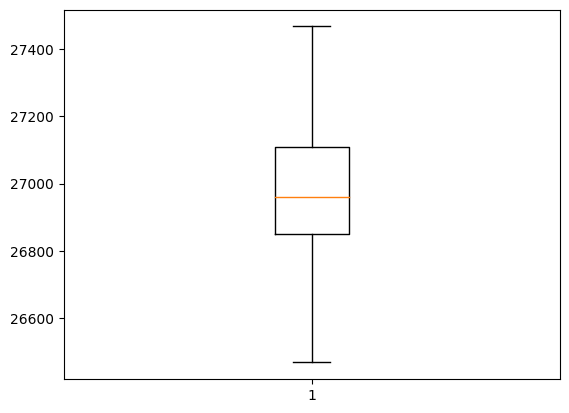

In [9]:
# Generar grafico boxplot para eliminar los valores atipicos (outliers) de la columna close

def visualizar_outliers():
  df = df_bitcoin_limpio
  
  
  plt.boxplot(df['Close'])
  plt.show()
"""
  sns.set(style="whitegrid", rc={"figure.figsize":(12,6)})

  cuartiles = [0, 0.25, 0.5, 0.75, 1]

  valores = df['Close'].quantile(cuartiles)

  colores = ['#4c72b0', '#55a868', '#c44e52', '#8172b2']

  sns.boxplot(y='Close', data=df, orient='v', palette=colores, whis=2, width=0.25)

  plt.axhline(y=valores[0], linestyle='--', color='#FFC0CB')
  plt.axhline(y=valores[1], linestyle='--', color='#FFC0CB')
  plt.axhline(y=df['Close'].mean(), linestyle='--', color='#FFC0CB')

  plt.text(-0.2, valores[0], f'Mínimo: {valores[0]:.0f}', fontsize=10, ha='center', va='bottom', color='#4682B4')
  plt.text(-0.2, valores[0.25], f'Q1: {valores[0.25]:.0f}', fontsize=10, ha='center', va='top', color='#1f77b4')
  plt.text(-0.2, valores[0.75], f'Q3: {valores[0.75]:.0f}', fontsize=10, ha='center', va='bottom', color='#1f77b4')
  plt.text(-0.2, valores[1], f'Máximo: {valores[1]:.0f}', fontsize=10, ha='center', va='bottom', color='#4682B4')
  plt.text(-0.2, df['Close'].mean(), f'Media: {df["Close"].mean():.0f}', fontsize=10, ha='center', va='top', color='#1f77b4')

  mediana = np.median(df['Close'])
  plt.text(-0.2, mediana, f'Mediana: {mediana:.0f}', fontsize=10, ha='center', va='bottom', color='black')

  plt.ylim(valores[0]-0.1*(valores[1]-valores[0]), valores[1]+0.1*(valores[1]-valores[0]))

  plt.title('Distribución de precios de Bitcoin en dólares', fontsize=16)

  plt.show()"""

visualizar_outliers()

In [ ]:
!python -V
print('------')
!pip show Pandas | grep 'Name\|Version'
print('------')
!pip show Numpy | grep 'Name\|Version'
print('------')
!pip show Matplotlib | grep 'Name\|Version'